# Clustering jerárquico y dendrogramas
* Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma

* X dataset (array de n x m) de puntos a clusterizar
* n número de datos
* m número de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

#### Importación de librerías

In [8]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

#### Creación de las series dummy  y gráfico de dispersión (scatter) partir de una semilla 

(150, 2)


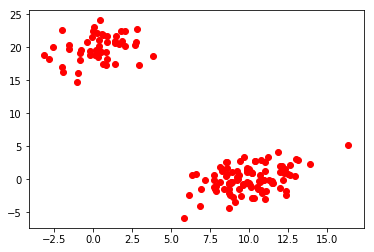

In [9]:
# Construcción de la semilla
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])

X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0],X[:,1], color = 'r')

In [10]:
X[-4:]

array([[ 0.88147155, 18.27186601],
       [ 2.7195152 , 20.75219444],
       [ 2.02869057, 20.20869005],
       [ 1.82184274, 21.00030037]])

* Los datos generados para la serie 'a', están posicionados en torno al punto 10 del eje 'X', con una desviación 
  típica de 3 puntos en horizontal y 4 en vertical.
  

* Los datos generados para la serie 'a', están posicionados en torno al punto 20 del eje 'Y', con una desviación 
  típica de 3 puntos en horizontal y 4 en vertical.
  



#### Generación de la matriz de enlace

In [11]:
Z = linkage(X, method = 'ward', metric = 'euclidean')
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

#### Coeficiente de Cophenet

In [12]:
from scipy.cluster.hierarchy import cophenet  # Coeficiente de cofenet
from scipy.spatial.distance import pdist  # 

In [13]:
# La función Cophenet pasar la matriz de enlace, y la función PDIST para la distancia de los datos
c, coph_dist = cophenet(Z, pdist(X))

# En el parámetro C, observamos la presición de la distancias
c

0.9800148387574268

In [14]:
# Acceder al primer registro de Z, es decir, la matriz de distancias [Z]
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

* En este array, se unió el punto 5.2 y el punto 5.3, con una distancia de 4.151055, y fueron 2 elementos.

In [15]:
# Mirar los 20 primeros elementos y todas las columnas del dataset
Z[0:20][:]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

#### Acceso a clústers

In [16]:
# Para saber cuales son los elementos que se unieron, y observarlos con detalle

print(Z[152-len(X)]) # Clúster 152
print(Z[158-len(X)]) # Clúster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


In [17]:
X[[33,62,68]][:]   # <-- índices que juntaron números parecidos PUNTOS DE INTERÉS

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

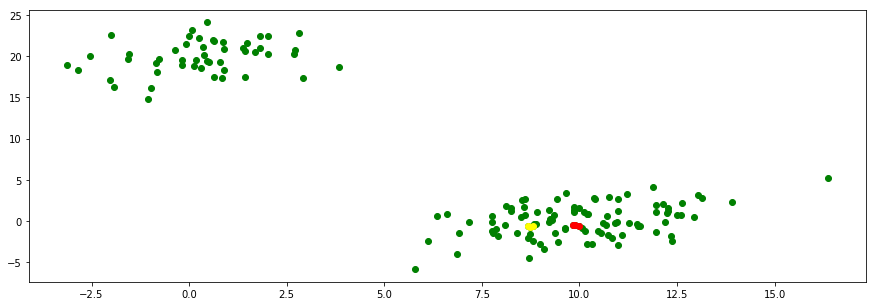

In [18]:
idx   = [33,62,68]   # <---- PUNTOS DE INTERÉS
idx2  = [15,69,41]

plt.figure(figsize=(15,5))
plt.scatter(X[:,0],X[:,1], color = 'green')   # <--- Pintar todos los puntos
plt.scatter(X[idx,0],X[idx,1], color = 'red')  #<--- Destacar puntos interesantes primer clúster
plt.scatter(X[idx2,0],X[idx2,1], color = 'yellow')  #<--- Destacar puntos interesantes segundo clúster

plt.show()

### Representación gráfica de un dendrograma

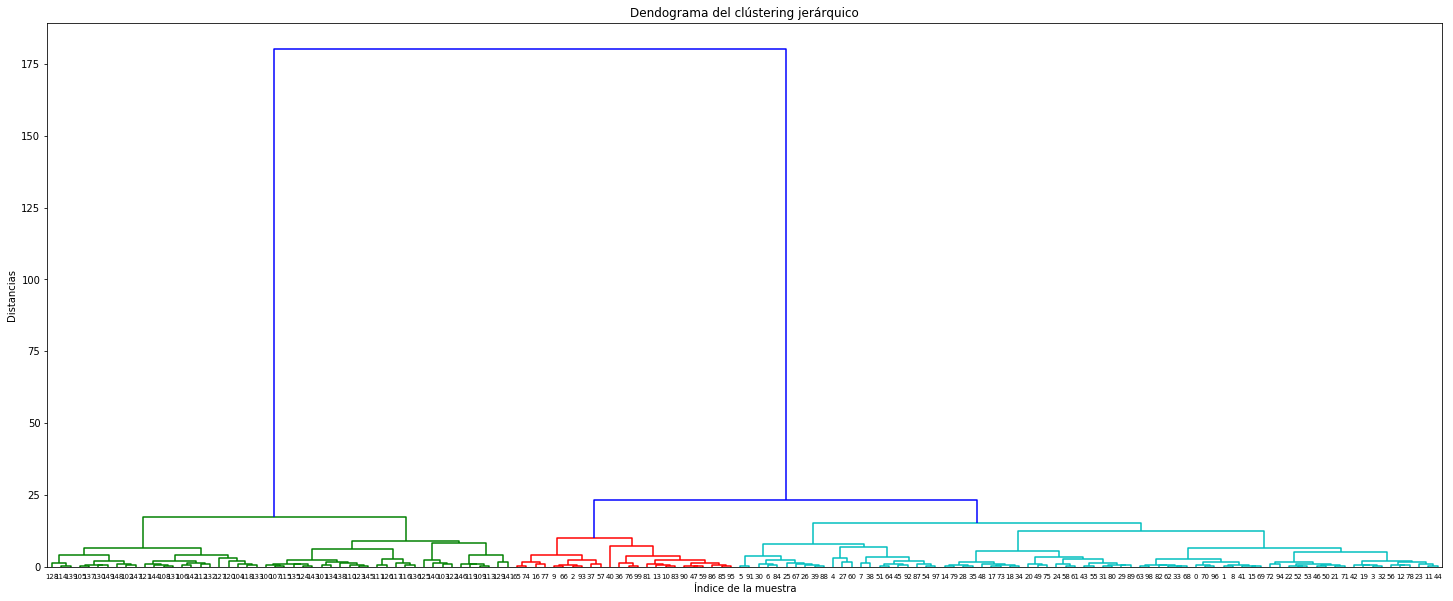

In [19]:
plt.figure (figsize = (25, 10))
plt.title('Dendograma del clústering jerárquico')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=.90, leaf_font_size= 7.0, 
          color_threshold = .1 * 180)   #<--- Si no se especifíca nada, se toma el 70 % de la distancia global
                                        # <-- 180 representa el total de los datos del set de ejemplo
plt.show()

### Truncar el dendrograma

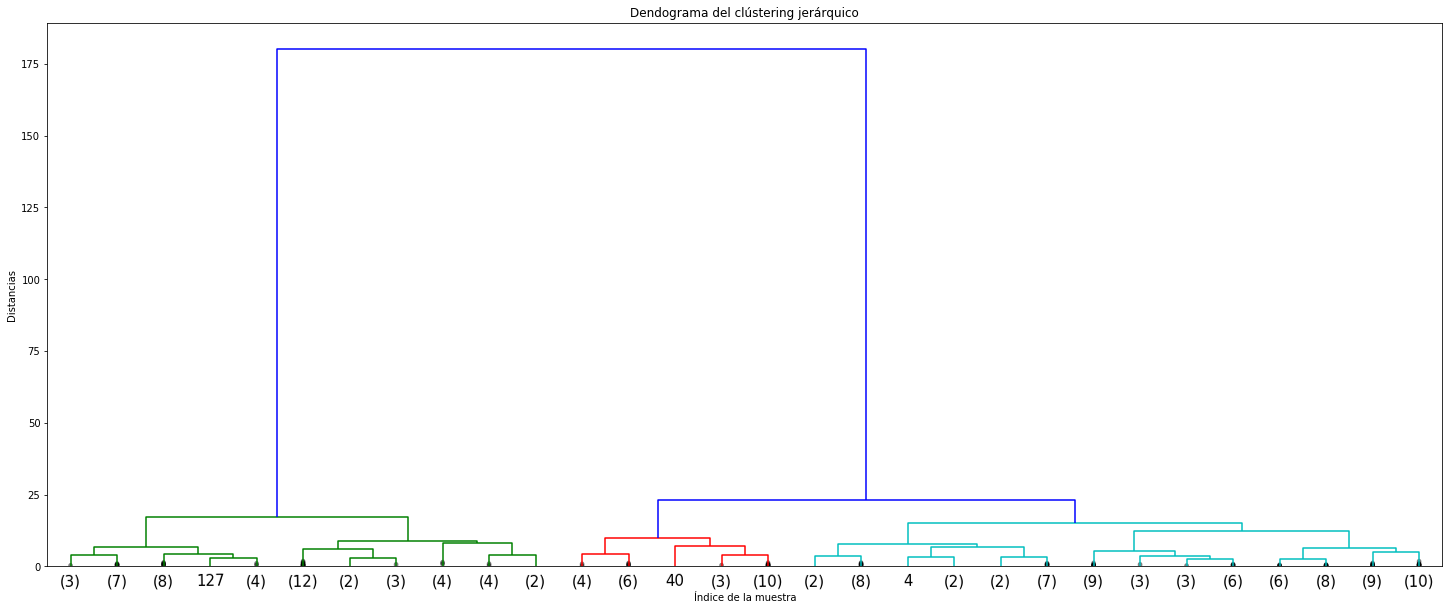

In [20]:
plt.figure (figsize = (25, 10))
plt.title('Dendograma del clústering jerárquico')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancias')
dendrogram(Z, leaf_rotation=.90, leaf_font_size= 15.0, 
          color_threshold = .1 * 180, truncate_mode = 'lastp', p = 30  # Truncate_Mode permite poner modo lastp, que
          , show_leaf_counts = True, show_contracted = True,           # muestra los últimos elementos (p), en este caso 30
          )                                                            #  Show_contracted --> contrae los últimos elementos 
plt.show()

* Los paréntesis representan la cantidad de datos en cada rama.

### Dendrograma personalizado (creando función)

In [21]:
def dendrogram_tune(*args, **kwargs):
    max_d= kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs )
    #print(ddata)
    if not kwargs.get('no_plot', False):
        plt.title('Clustering jerarquico con dendrograma truncado')
        plt.xlabel('Indice del dataset (o tamaño del cluster)')
        plt.ylabel('Distancia')
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1]
            if y> annotate_above:
                plt.plot(x, y, 'o', c = color)
                plt.annotate('%.3g'%y, (x,y), xytext = (0,-5), textcoords = 'offset points',
                            va = 'top', ha = 'center')
                
    if max_d: 
        plt.axhline(y= max_d, c = 'k')
    return ddata

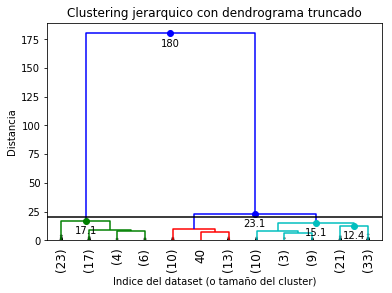

In [22]:
# Función para construir dendrograma
    # truncate_mode ---> Trunca el dendrograma con los últimos registros (P), que en este caso vale 12
    # p --> número de registros a mostrar
    # leaf_rotation ---> Para mostrar las etiquetas en vertical
    # leaf_font_size ---> Para asignar el tamaño de fuente
    # show_contracted ----> True para contraer los brazos del dendrograma
    # annotate_above ---> Para mostrar las etiquetas de las distancias
    # max_d ---> pinta una línea que cruza el dendrograma en la distancia indicada y cambia de color los clústers

dendrogram_tune(Z, truncate_mode = 'lastp', p = 12, leaf_rotation = 90., leaf_font_size = 12., 
               show_contracted = True, annotate_above = 10, max_d = 20)
plt.show()

### Corte automático del dendrograma

In [23]:
# Importar paquete para método de inconsistencia
from scipy.cluster.hierarchy import inconsistent

In [24]:
depth = 5    # Profundidad del árbol
incons = inconsistent(Z, depth)   # Datos y profundidad del árbol para hacer clústers
incons   # Muestra los clústers

#Promedio en primera columna, desviación estándar en la segunda, count en la tercera, y en la cuarta factor de inconsistencia

incons[-10:, :]  # Para mostrar las últimas 10 columnas

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


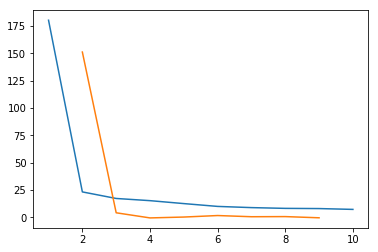

El número óptimo de clúster es 2


In [25]:
import numpy as np

last = Z[-10:,2]  # <--- Las 10 últimas filas, solo la segunda columna
last_rev = last[::-1]  #<---- Revertir la selección
print(last_rev)
idx = np.arange(1,len(last)+1)
plt.plot(idx, last_rev)

# Aceleraciones
acc = np.diff(last, 2)   #<-- Resta el primero menos el segundo
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print('El número óptimo de clúster es %s' %str(k))

### Recuperar los clústers y sus elementos

In [26]:
from scipy.cluster.hierarchy import fcluster

In [27]:
# Método 1, cortar por distancia

max_d = 20
clusters = fcluster(Z, max_d, criterion = 'distance')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##### Tomando como referencia el dendrograma creado con la función 'dendrogram_tune', selecciona el corte que en ese caso fue 20, y con ese corte aparecieron 3 clústers, entonces se invoca la función fcluster para marcar cada registro con el número de clúster al que pertenece.

In [28]:
# Método 2, cortar por cantidad de clústers (en este caso 3)

k = 3  # máximo número de clústers
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters


array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [29]:
# Método de inconsistencia
fcluster (Z, 8, depth = 10)   # depth --> representa la profundidad a la que debe buscar la función (dentro del árbol)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Representación gráfica

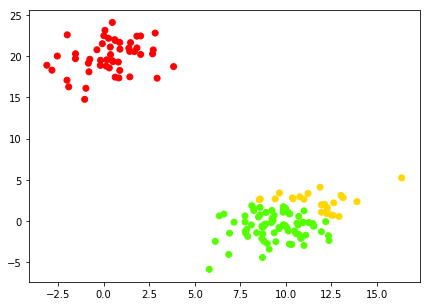

In [30]:
# Imprime con colores diferentes (le asignamos la función clúster creada arriba)

# Método 1, cortar por distancia

max_d = 18

clusters = fcluster(Z, max_d, criterion = 'distance')
clusters

plt.figure(figsize = (7,5))
plt.scatter(X[:,0], X[:,1], c = clusters, cmap = 'prism')   # Todas las filas columna 0, todas las filas columna 1
plt.show()